In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Algorithm 1

In [2]:
def convexHullAlgo(points):
  #determining vertex with minimum y-coordinate
  y_min_index = np.argmin(points, axis = 0)[1]
  vertices = []
  vertex_1 = points[y_min_index]
  vertices.append(vertex_1)

  #determining other vertices
  e1 = np.array([1, 0])

  #deleting the determined vertex from set of points
  points = np.delete(points, y_min_index, axis = 0)

  max_prod = -np.inf
  next_vertex = 0
  next_coords = 0
  for i,point in enumerate(points):
    prod = (point - vertex_1) @ e1 / (np.linalg.norm(point - vertex_1))
    if(prod > max_prod):
      max_prod = prod
      next_vertex = point
      next_coords = i

  #adding the next vertex and discarding it from the set of points
  vertices.append(next_vertex)
  points = np.delete(points, next_coords, axis = 0)

  #adding the first point in the points for the termination of loop condition
  points = np.append(points, vertex_1.reshape(1,2), axis = 0)
  vertex = vertices[1]

  #updating the unit base vector from which angle is measured
  e1 = (vertices[1] - vertices[0]) / np.linalg.norm((vertices[1] - vertices[0]))

  #terminate when current vertex reaches the initial point
  while(not np.array_equal(vertex, vertex_1)):
    max_prod = -np.inf
    for i,point in enumerate(points):
      temp = point - vertex
      prod = temp @ e1 / np.linalg.norm(temp)
      if(prod > max_prod):
        max_prod = prod
        next_vertex = point
        next_coords = i
    e1 = (next_vertex - vertex) / np.linalg.norm(next_vertex - vertex)
    vertices.append(next_vertex)
    points = np.delete(points, next_coords, axis = 0)
    vertex = next_vertex

  #deliberately keeping the initial point in the hull so that the graph looks a closed polygon
  #vertices.pop(len(vertices) - 1)
  vertices = np.array(vertices)
  return vertices

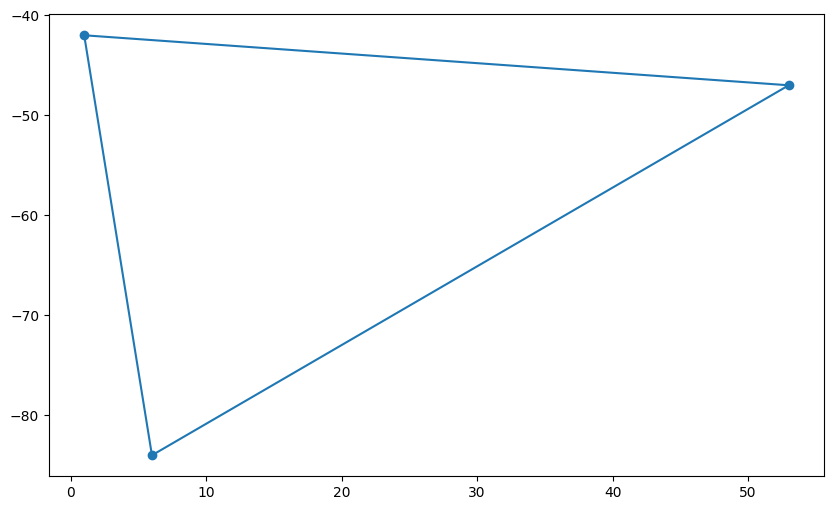

In [5]:
points = []
for i in range(3):
  x = np.random.randint(-100,100)
  y = np.random.randint(-100,100)
  points.append((x,y))

points = np.array(points)

convex_hull = convexHullAlgo(points)

x_cords = []
y_cords = []
hull_x_cords = []
hull_y_cords = []
for i in range(len(points)):
  x_cords.append(points[i][0])
  y_cords.append(points[i][1])

for i in range(len(convex_hull)):
  hull_x_cords.append(convex_hull[i][0])
  hull_y_cords.append(convex_hull[i][1])


plt.figure(figsize = (10,6))
plt.scatter(x_cords, y_cords)
plt.plot(hull_x_cords, hull_y_cords)

# Quick Hull Algorithm

In [6]:
#function to calculate distance of point point3 from the line determined by point1 and point2
def distance(point1, point2, point3):
  if point1[0] != point2[0]:
    m = (point2[1] - point1[1]) / (point2[0] - point1[0])
    numerator = m*(point3[0] - point1[0]) - (point3[1] - point1[1])
    denominator = np.sqrt(m**2 + 1)
    return numerator / denominator
  else:
    return point3[0] - point1[0]

#function to include points on either side of the line defined by point1 and point2
# side determines on which side the points lies with respect to the line
# side = 1 if points are on left, 0 otherwise
def extend_hull(point1, point2, points, side):
  if not points:
    return None

  #Determining the farthest point from the line determined by point1 and point2
  vertices = []
  max_distance = -np.inf
  farthest_vertex = None
  for point in points:
    d = distance(point1, point2, point)
    if(max_distance < d):
      max_distance = d
      farthest_vertex = point

  vertices.append(farthest_vertex)
  vertices = np.array(vertices)

  #if the points are on left side only consider the points outside of the triangle
  #determined by point1, point2 and farthest_vertex
  if(side != 0):
    x2 = farthest_vertex[0]
    x1 = point1[0]

    #if points are on left side, consider the points only from left side of the line determined by point1 and farthest_vertex
    points_on_left1 = [p for p in points if (x2 - x1)*distance(point1, farthest_vertex, p) > 0]

    x1 = x2
    x2 = point2[0]

    #similarly consider only points on left side of the line determined by farthest_vertex and point2(order matters)
    points_on_left2 = [p for p in points if (x2 - x1)*distance(farthest_vertex, point2, p) > 0]

    vertices1 = extend_hull(point1, farthest_vertex, points_on_left1, 1)
    vertices2 = extend_hull(farthest_vertex, point2, points_on_left2, 1)
    vertices = np.append(vertices, vertices1.reshape(1, 2), axis = 0)
    vertices = np.append(vertices, vertices2.reshape(1,2), axis = 0)

    return vertices

  #Similarly for the points on right side
  else:
    x2 = farthest_vertex[0]
    x1 = point1[0]
    points_on_right1 = [p for p in points if (x2 - x1)*distance(point1, farthest_vertex, p) < 0]
    x1 = x2
    x2 = point2[0]
    points_on_right2 = [p for p in points if (x2 - x1)*distance(farthest_vertex, point2, p) < 0]
    vertices1 = extend_hull(point1, farthest_vertex, points_on_right1, 0)
    vertices2 = extend_hull(farthest_vertex, point2, points_on_right2, 0)
    vertices = np.append(vertices, vertices1.reshape(1, 2), axis = 0)
    vertices = np.append(vertices, vertices2.reshape(1,2), axis = 0)

    return vertices

#Quick hull function to get the convex hull of a given set of points
def quickHull(points):
  #determining vertices with minimum and maximum y-coordinate
  y_min_index = np.argmin(points, axis = 0)[1]
  y_max_index = np.argmax(points, axis = 0)[1]
  vertices = []
  vertex_1 = points[y_min_index]
  vertex_2 = points[y_max_index]
  vertices.append(vertex_1)
  vertices.append(vertex_2)
  vertices = np.array(vertices)

  #determining the next vertex

  #points on left side of the line defined by vertex1 and vertex2
  points_on_left = [p for p in points if (vertex_2[0] - vertex_1[0])*distance(vertex_1, vertex_2, p) > 0]

  #points on right side of the line determined by vertex1 and vertex2
  points_on_right = [p for p in points if (vertex_2[0] - vertex_1[0])*distance(vertex_1, vertex_2, p) < 0]

  #Including the rest of the points from the either side with similar approach
  vertices1 = extend_hull(vertex_1, vertex_2, points_on_left, 1)
  vertices2 = extend_hull(vertex_1, vertex_2, points_on_right, 0)

  vertices = np.append(vertices, vertices1, axis = 0)
  vertices = np.append(vertices, vertices2, axis = 0)

  return vertices

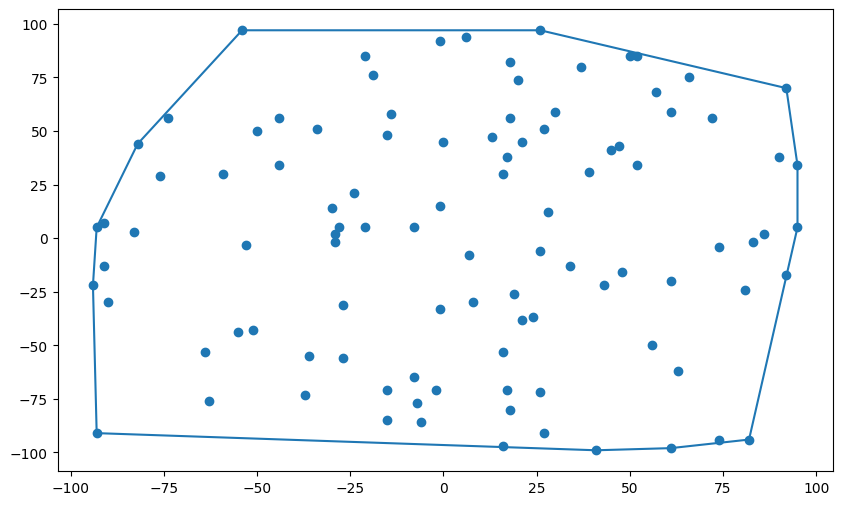

In [8]:
points = []
for i in range(100):
  x = np.random.randint(-100,100)
  y = np.random.randint(-100,100)
  points.append((x,y))

points = np.array(points)

convex_hull = convexHullAlgo(points)

x_cords = []
y_cords = []
hull_x_cords = []
hull_y_cords = []
for i in range(len(points)):
  x_cords.append(points[i][0])
  y_cords.append(points[i][1])

for i in range(len(convex_hull)):
  hull_x_cords.append(convex_hull[i][0])
  hull_y_cords.append(convex_hull[i][1])


plt.figure(figsize = (10,6))
plt.scatter(x_cords, y_cords)
plt.plot(hull_x_cords, hull_y_cords)